In [295]:
# imports

#General
import numpy as np
import pandas as pd
import itertools
import pickle
from kneed import KneeLocator  # find knee in a plot

# System
import os, fnmatch

# Visualization
import seaborn as sns #visualization library, must be imported before all other plotting libraries
import matplotlib.pyplot as plt
from IPython.core.display import HTML, display, Image



# Machine Learning
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans , AffinityPropagation, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics.cluster import adjusted_rand_score , rand_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.cluster import normalized_mutual_info_score

from numpy.random import seed
seed(1)


# Configurations
path='./data/'

## Load feature vectors and labels

In [245]:
with open('x.pkl', 'rb') as f:
    feature_vectors = pickle.load(f)
with open('y.pkl', 'rb') as f:
    classes_num = pickle.load(f)

## Standardization: Zero-Mean and Unit-Variance

In [248]:
# Scale features using Standard Scaler
scaler = StandardScaler()
scaled_feature_vectors = scaler.fit_transform(np.array(feature_vectors))
print("Feature vectors shape:",scaled_feature_vectors.shape)

Feature vectors shape: (1490, 82)


## Tune number of clusters in Agglomerative Clustering

In [325]:
# Function to calculate Sum of squared distances of samples to their closest cluster center
def rand_index_Agglome_Clustering(number_clusters):
    rand_index=[]
    for i in number_clusters:
        model= AgglomerativeClustering(n_clusters=i , 
                               affinity='euclidean',
                              linkage='ward')

        model.fit(scaled_feature_vectors)
        identified_clusters = model.fit_predict(scaled_feature_vectors)
        rand_index.append(adjusted_rand_score(identified_clusters, classes_num))
    return rand_index

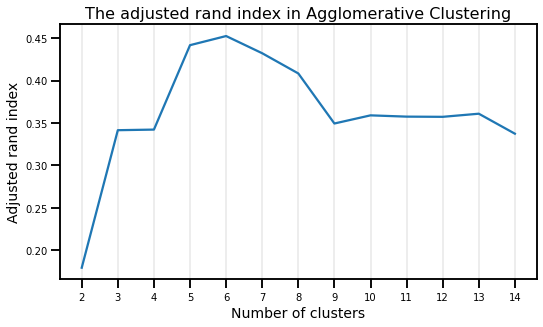

In [328]:
# Plot cost of clustering
number_clusters = range(2,15)
wcss = rand_index_Agglome_Clustering(number_clusters)

fig, axis = plt.subplots(figsize=(8,5))
axis.plot(number_clusters,wcss)
axis.set_title('The adjusted rand index in Agglomerative Clustering', fontsize=16)
axis.set_xlabel('Number of clusters', fontsize=14)
axis.set_ylabel('Adjusted rand index', fontsize=14)
axis.grid(axis='x', alpha =0.3)
plt.xticks(number_clusters)
axis.tick_params(axis='x', labelsize=10)
axis.tick_params(axis='y', labelsize=10)
plt.savefig('adjusted_in_aggClu.jpg')
plt.tight_layout()

## Plot clusters using LDA

In [340]:
# Tuned K means
model= AgglomerativeClustering(n_clusters=6 , 
                               affinity='euclidean',
                              linkage='ward')
model.fit(scaled_feature_vectors)
identified_clusters = model.fit_predict(scaled_feature_vectors)

In [335]:
# Use LDA to find xy axis for best discrimenant axis for ploting the clusters
clf = LinearDiscriminantAnalysis(n_components=2)
xy=clf.fit(scaled_feature_vectors, identified_clusters).transform(scaled_feature_vectors)

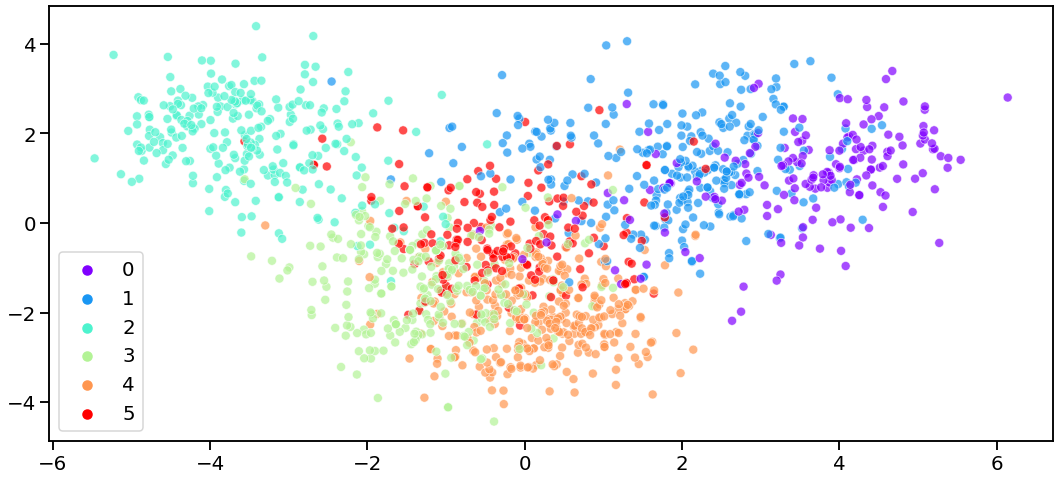

In [336]:
# plot cluster in 2D
fig, axis = plt.subplots(figsize=(18,8) )
sns.scatterplot(
    x=xy[:,0],
    y=xy[:,1],
    hue=identified_clusters,
    palette='rainbow',
    alpha=0.7,
    edgecolors='b',
    sizes=2,
    legend= 'brief',
)
plt.savefig('clustering_agg_k.jpg')
plt.show()

In [341]:
# metric for clustering
adjusted_rand_score(identified_clusters, classes_num)

0.4525471820282

In [342]:
rand_score(identified_clusters, classes_num)

0.8444476496545135